<a href="https://colab.research.google.com/github/NadiaAnwar121/Fashion-MNIST/blob/main/Codsoft_Task_3_Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


In [ ]:
# Assuming your dataset is in a CSV file named 'iris_dataset.csv'
df = pd.read_csv('/content/IRIS.csv')


In [ ]:
# Display the first few rows of the dataset
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
# Explore unique values in the 'species' column
print("Unique species:\n", df['species'].unique())

Unique species:
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


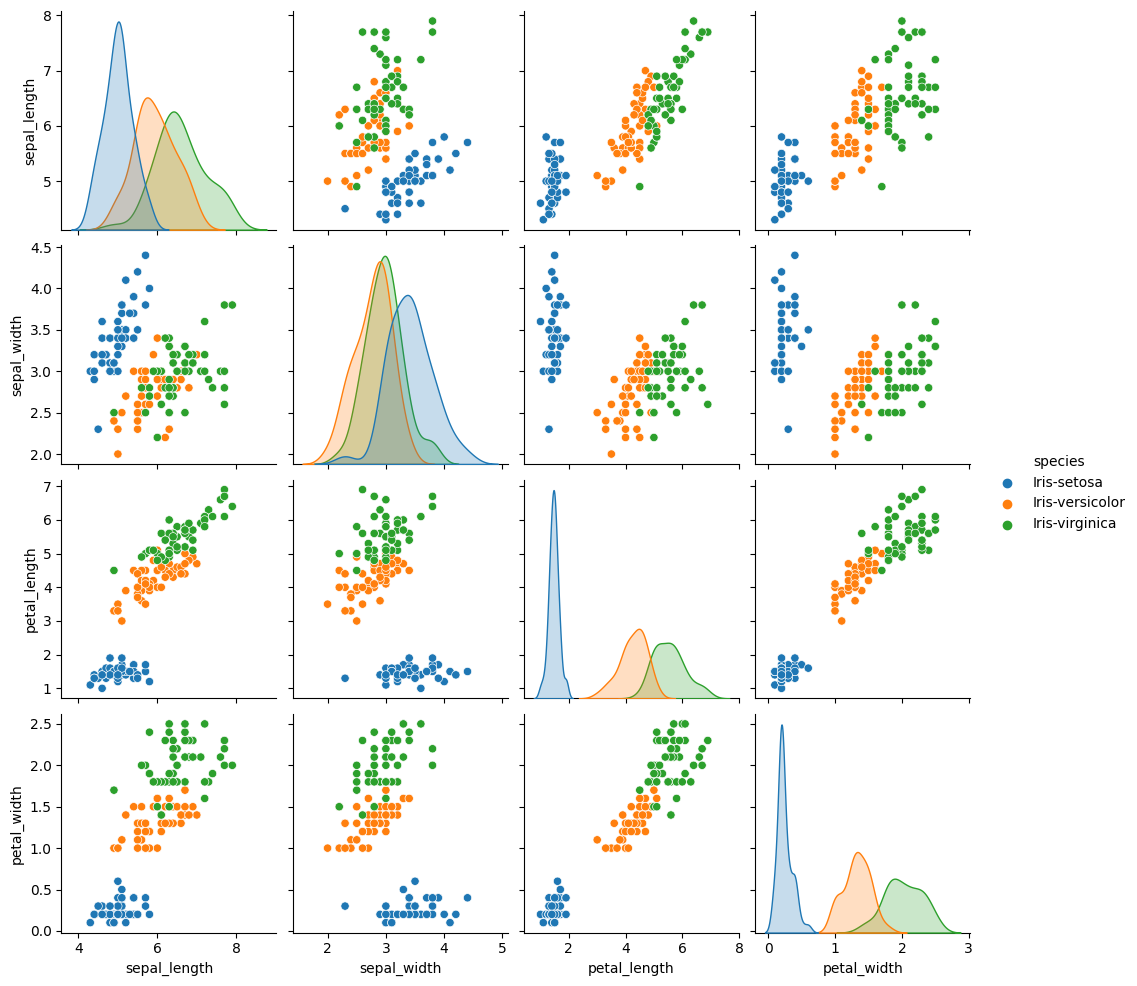

In [ ]:
# Visualize the distribution of each feature by species
sns.pairplot(df, hue='species')
plt.show()

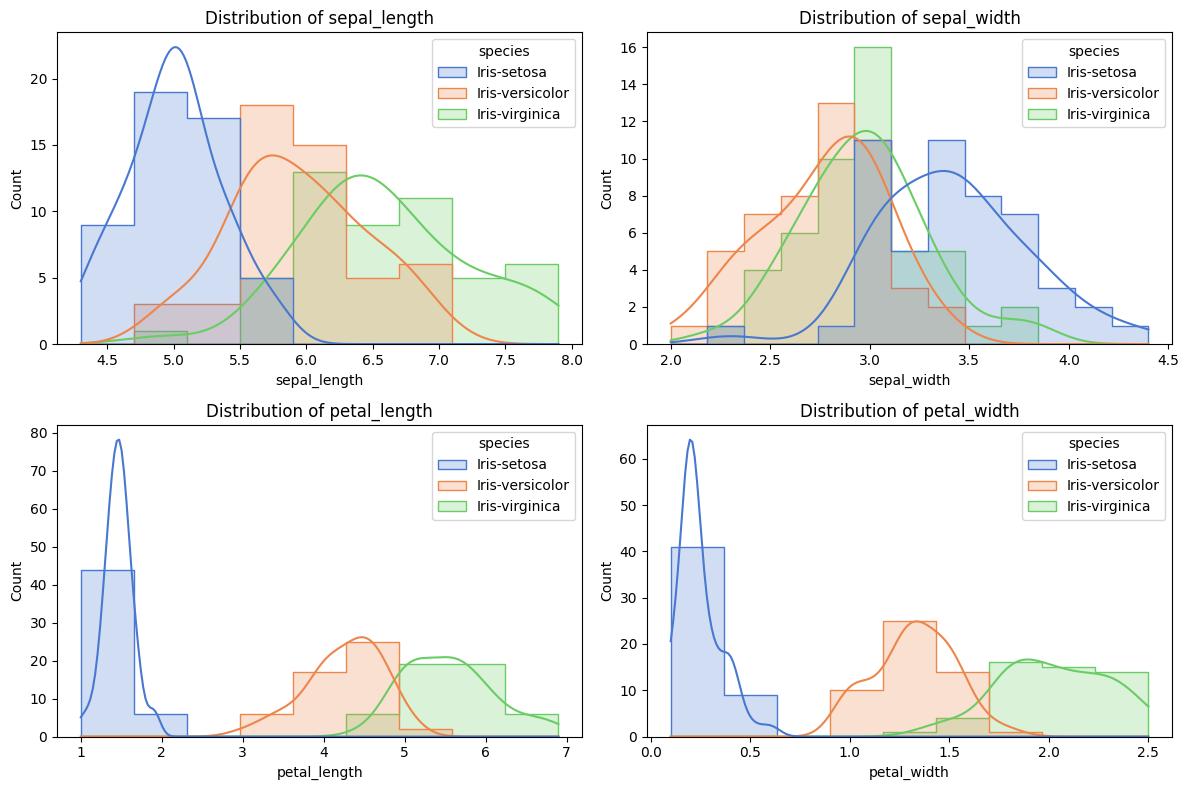

In [ ]:
# Explore the distribution of each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=feature, kde=True, hue='species', element="step", palette="muted")
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
# Encode the 'species' column using Label Encoding
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# Split the data into features (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Choose a machine learning model (e.g., Decision Tree, Random Forest, Support Vector Machine, etc.)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


In [ ]:
#Train the Model
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
#Make Predictions
y_pred = model.predict(X_test)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



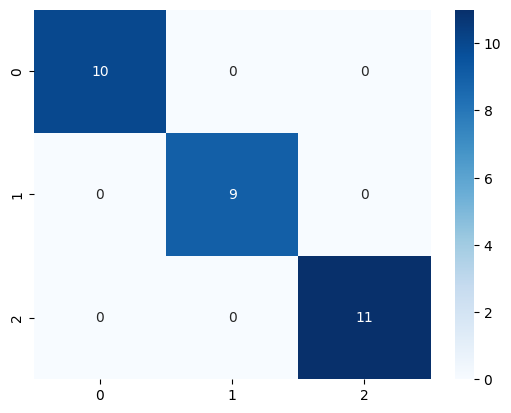

In [ ]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()

In [ ]:
# Perform cross-validation to assess the model's performance
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV accuracy: {np.mean(cv_scores)}')


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean CV accuracy: 0.96
